In [79]:
import pandas as pd

file_path = '/Users/MinxuanLuo/Desktop/Subnational Unit-data.csv'

df = pd.read_csv(file_path)

df_cases = df[df['Metric'] == 'Incidence Rate']

df_filtered = df_cases[(df_cases['Name'] == 'Tigray') | (df_cases['Name'] == 'Somali')]

df_filtered = df_filtered[(df_filtered['Year'] >= 2010) & (df_filtered['Year'] <= 2021)]

df_filtered['Treatment'] = df_filtered['Name'].apply(lambda x: 1 if x == 'Tigray' else 0)

df_filtered['Post'] = df_filtered['Year'].apply(lambda x: 1 if x >= 2016 else 0)

df_filtered['Treatment_Post'] = df_filtered['Treatment'] * df_filtered['Post']

print("Filtered data:")
print(df_filtered.head())
print("\nMissing value summary:")
print(df_filtered.isnull().sum())

save_path = '/Users/MinxuanLuo/Desktop/filtered_data11.csv'
df_filtered.to_csv(save_path, index=False)

print(f"File saved at: {save_path}")


数据筛选结果：
   ISO3 National Unit    Name Admin Level          Metric               Units  \
39  ETH      Ethiopia  Tigray      admin1  Incidence Rate  Cases per Thousand   
40  ETH      Ethiopia  Tigray      admin1  Incidence Rate  Cases per Thousand   
41  ETH      Ethiopia  Tigray      admin1  Incidence Rate  Cases per Thousand   
42  ETH      Ethiopia  Tigray      admin1  Incidence Rate  Cases per Thousand   
43  ETH      Ethiopia  Tigray      admin1  Incidence Rate  Cases per Thousand   

    Year       Value  Treatment  Post  Treatment_Post  
39  2010  218.915589          1     0               0  
40  2011  150.775489          1     0               0  
41  2012  117.680588          1     0               0  
42  2013   89.636329          1     0               0  
43  2014   41.794347          1     0               0  

缺失值统计：
ISO3              0
National Unit     0
Name              0
Admin Level       0
Metric            0
Units             0
Year              0
Value             0
T

In [80]:
import pandas as pd

file_path = '/Users/MinxuanLuo/Desktop/filtered_data11.csv'

df_filtered = pd.read_csv(file_path)

print("Data overview:")
print(df_filtered.head())
print(df_filtered.info())

print("Column names in the data:", df_filtered.columns)

print("\nMissing value summary:")
print(df_filtered.isnull().sum())



数据概览：
  ISO3 National Unit    Name Admin Level          Metric               Units  \
0  ETH      Ethiopia  Tigray      admin1  Incidence Rate  Cases per Thousand   
1  ETH      Ethiopia  Tigray      admin1  Incidence Rate  Cases per Thousand   
2  ETH      Ethiopia  Tigray      admin1  Incidence Rate  Cases per Thousand   
3  ETH      Ethiopia  Tigray      admin1  Incidence Rate  Cases per Thousand   
4  ETH      Ethiopia  Tigray      admin1  Incidence Rate  Cases per Thousand   

   Year       Value  Treatment  Post  Treatment_Post  
0  2010  218.915589          1     0               0  
1  2011  150.775489          1     0               0  
2  2012  117.680588          1     0               0  
3  2013   89.636329          1     0               0  
4  2014   41.794347          1     0               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------

In [81]:
import scipy.stats as stats

pre_data = df_filtered[df_filtered['Year'] < 2016]

mean_tigray = pre_data[pre_data['Name'] == 'Tigray']['Value'].mean()
mean_somali = pre_data[pre_data['Name'] == 'Somali']['Value'].mean()

std_tigray = pre_data[pre_data['Name'] == 'Tigray']['Value'].std()
std_somali = pre_data[pre_data['Name'] == 'Somali']['Value'].std()

print(f"Tigray baseline mean: {mean_tigray:.2f}, standard deviation: {std_tigray:.2f}")
print(f"Somali baseline mean: {mean_somali:.2f}, standard deviation: {std_somali:.2f}")

t_stat, p_value = stats.ttest_ind(
    pre_data[pre_data['Name'] == 'Tigray']['Value'],
    pre_data[pre_data['Name'] == 'Somali']['Value']
)

print(f"T-test statistic: {t_stat:.2f}, p-value: {p_value:.3f}")


Tigray 基线均值: 111.59, 标准差: 66.56
Somali 基线均值: 103.18, 标准差: 26.28
T 检验统计量: 0.29, p 值: 0.779


In [39]:
import statsmodels.formula.api as smf

model = smf.ols('Value ~ Treatment + Post + Treatment_Post', data=df_filtered).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     5.626
Date:                Sun, 05 Jan 2025   Prob (F-statistic):            0.00579
Time:                        23:44:11   Log-Likelihood:                -118.34
No. Observations:                  24   AIC:                             244.7
Df Residuals:                      20   BIC:                             249.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        103.1841     14.985      6.

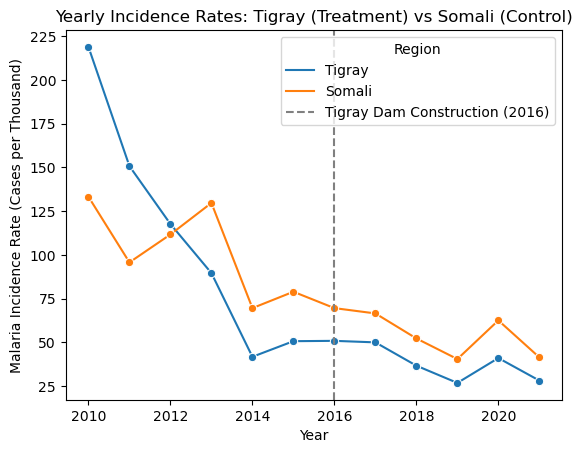

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df_filtered, x='Year', y='Value', hue='Name', marker='o')

plt.axvline(2016, color='gray', linestyle='--', label='Tigray Dam Construction (2016)')

plt.title('Yearly Incidence Rates: Tigray (Treatment) vs Somali (Control)')
plt.xlabel('Year')
plt.ylabel('Malaria Incidence Rate (Cases per Thousand)')  
plt.legend(title='Region')

plt.show()


In [83]:
import pandas as pd

file_path = '/Users/MinxuanLuo/Desktop/Subnational Unit-data.csv'

df = pd.read_csv(file_path)

df_cases = df[df['Metric'] == 'Incidence Rate']

df_filtered = df_cases[(df_cases['Name'] == 'Centre-Sud') | (df_cases['Name'] == 'Hauts-Bassins')]

df_filtered = df_filtered[(df_filtered['Year'] >= 2010) & (df_filtered['Year'] <= 2021)]

df_filtered['Treatment'] = df_filtered['Name'].apply(lambda x: 1 if x == 'Centre-Sud' else 0)

df_filtered['Post'] = df_filtered['Year'].apply(lambda x: 1 if x >= 2015 else 0)

df_filtered['Treatment_Post'] = df_filtered['Treatment'] * df_filtered['Post']

print(df_filtered.head())
print(df_filtered.isnull().sum())

save_path = '/Users/MinxuanLuo/Desktop/filtered_data22.csv'

df_filtered.to_csv(save_path, index=False)

print(f"File has been saved to: {save_path}")


数据筛选结果：
   ISO3 National Unit        Name Admin Level          Metric  \
78  BFA  Burkina Faso  Centre-Sud      admin1  Incidence Rate   
79  BFA  Burkina Faso  Centre-Sud      admin1  Incidence Rate   
80  BFA  Burkina Faso  Centre-Sud      admin1  Incidence Rate   
81  BFA  Burkina Faso  Centre-Sud      admin1  Incidence Rate   
82  BFA  Burkina Faso  Centre-Sud      admin1  Incidence Rate   

                 Units  Year       Value  Treatment  Post  Treatment_Post  
78  Cases per Thousand  2010  596.362266          1     0               0  
79  Cases per Thousand  2011  593.217799          1     0               0  
80  Cases per Thousand  2012  581.307965          1     0               0  
81  Cases per Thousand  2013  525.637372          1     0               0  
82  Cases per Thousand  2014  455.952745          1     0               0  

缺失值统计：
ISO3              0
National Unit     0
Name              0
Admin Level       0
Metric            0
Units             0
Year             

In [45]:
import pandas as pd

file_path = '/Users/MinxuanLuo/Desktop/filtered_data22.csv'

df_filtered = pd.read_csv(file_path)

print("Data Overview:")
print(df_filtered.head())  
print(df_filtered.info()) 

print("Column Names in the Data:", df_filtered.columns)

print("\nMissing Value Statistics:")
print(df_filtered.isnull().sum())


数据概览：
  ISO3 National Unit        Name Admin Level          Metric  \
0  BFA  Burkina Faso  Centre-Sud      admin1  Incidence Rate   
1  BFA  Burkina Faso  Centre-Sud      admin1  Incidence Rate   
2  BFA  Burkina Faso  Centre-Sud      admin1  Incidence Rate   
3  BFA  Burkina Faso  Centre-Sud      admin1  Incidence Rate   
4  BFA  Burkina Faso  Centre-Sud      admin1  Incidence Rate   

                Units  Year       Value  Treatment  Post  Treatment_Post  
0  Cases per Thousand  2010  596.362266          1     0               0  
1  Cases per Thousand  2011  593.217799          1     0               0  
2  Cases per Thousand  2012  581.307965          1     0               0  
3  Cases per Thousand  2013  525.637372          1     0               0  
4  Cases per Thousand  2014  455.952745          1     0               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------

In [84]:
import scipy.stats as stats

pre_data = df_filtered[df_filtered['Year'] < 2015]

mean_Centre_Sud = pre_data[pre_data['Name'] == 'Centre-Sud']['Value'].mean()
mean_Hauts_Bassins = pre_data[pre_data['Name'] == 'Hauts-Bassins']['Value'].mean()

std_Centre_Sud = pre_data[pre_data['Name'] == 'Centre-Sud']['Value'].std()
std_Hauts_Bassins = pre_data[pre_data['Name'] == 'Hauts-Bassins']['Value'].std()

print(f"Centre-Sud Baseline Mean: {mean_Centre_Sud:.2f}, Standard Deviation: {std_Centre_Sud:.2f}")
print(f"Hauts-Bassins Baseline Mean: {mean_Hauts_Bassins:.2f}, Standard Deviation: {std_Hauts_Bassins:.2f}")

t_stat, p_value = stats.ttest_ind(
    pre_data[pre_data['Name'] == 'Centre-Sud']['Value'],
    pre_data[pre_data['Name'] == 'Hauts-Bassins']['Value']
)

print(f"T-Test Statistic: {t_stat:.2f}, p-value: {p_value:.3f}")


Centre-Sud 基线均值: 550.50, 标准差: 60.07
Hauts-Bassins 基线均值: 494.07, 标准差: 40.37
T 检验统计量: 1.74, p 值: 0.119


In [85]:
import statsmodels.formula.api as smf

model = smf.ols('Value ~ Treatment + Post + Treatment_Post', data=df_filtered).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     53.08
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           1.05e-09
Time:                        20:26:50   Log-Likelihood:                -122.32
No. Observations:                  24   AIC:                             252.6
Df Residuals:                      20   BIC:                             257.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        494.0698     19.375     25.

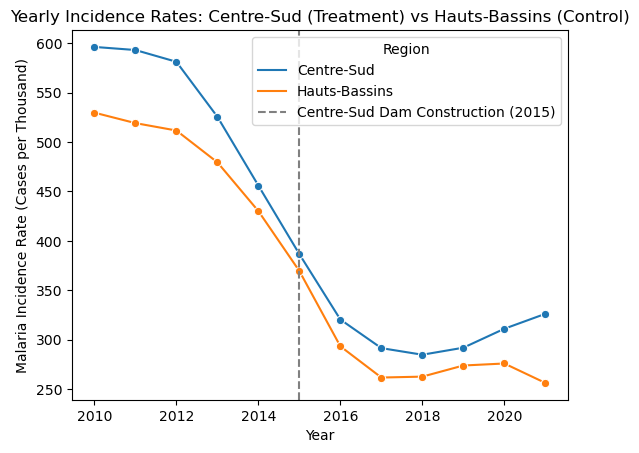

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df_filtered, x='Year', y='Value', hue='Name', marker='o')

plt.axvline(2015, color='gray', linestyle='--', label='Centre-Sud Dam Construction (2015)')

plt.title('Yearly Incidence Rates: Centre-Sud (Treatment) vs Hauts-Bassins (Control)')
plt.xlabel('Year')
plt.ylabel('Malaria Incidence Rate (Cases per Thousand)')  
plt.legend(title='Region')

plt.show()


In [87]:
import pandas as pd

file_path = '/Users/MinxuanLuo/Desktop/Subnational Unit-data.csv'

df = pd.read_csv(file_path)

df_cases = df[df['Metric'] == 'Incidence Rate']

df_filtered = df_cases[(df_cases['Name'] == 'North-Western') | (df_cases['Name'] == 'Copperbelt')]

df_filtered = df_filtered[(df_filtered['Year'] >= 2010) & (df_filtered['Year'] <= 2021)]

df_filtered['Treatment'] = df_filtered['Name'].apply(lambda x: 1 if x == 'North-Western' else 0)

df_filtered['Post'] = df_filtered['Year'].apply(lambda x: 1 if x >= 2016 else 0)

df_filtered['Treatment_Post'] = df_filtered['Treatment'] * df_filtered['Post']

print("Filtered Data:")
print(df_filtered.head())
print("\nMissing Value Count:")
print(df_filtered.isnull().sum())

df_filtered.to_csv('filtered_data.csv', index=False)

save_path = '/Users/MinxuanLuo/Desktop/filtered_data33.csv'

df_filtered.to_csv(save_path, index=False)

print(f"File has been saved to: {save_path}")


数据筛选结果：
  ISO3 National Unit        Name Admin Level          Metric  \
0  ZMB        Zambia  Copperbelt      admin1  Incidence Rate   
1  ZMB        Zambia  Copperbelt      admin1  Incidence Rate   
2  ZMB        Zambia  Copperbelt      admin1  Incidence Rate   
3  ZMB        Zambia  Copperbelt      admin1  Incidence Rate   
4  ZMB        Zambia  Copperbelt      admin1  Incidence Rate   

                Units  Year       Value  Treatment  Post  Treatment_Post  
0  Cases per Thousand  2010  144.663192          0     0               0  
1  Cases per Thousand  2011  141.199651          0     0               0  
2  Cases per Thousand  2012  145.368155          0     0               0  
3  Cases per Thousand  2013  165.511599          0     0               0  
4  Cases per Thousand  2014  185.889217          0     0               0  

缺失值统计：
ISO3              0
National Unit     0
Name              0
Admin Level       0
Metric            0
Units             0
Year              0
Value    

In [88]:
import pandas as pd

file_path = '/Users/MinxuanLuo/Desktop/filtered_data33.csv'

df_filtered = pd.read_csv(file_path)

print("Data Overview:")
print(df_filtered.head())
print(df_filtered.info())

print("Column Names in the Data:", df_filtered.columns)

print("\nMissing Value Count:")
print(df_filtered.isnull().sum())


数据概览：
  ISO3 National Unit        Name Admin Level          Metric  \
0  ZMB        Zambia  Copperbelt      admin1  Incidence Rate   
1  ZMB        Zambia  Copperbelt      admin1  Incidence Rate   
2  ZMB        Zambia  Copperbelt      admin1  Incidence Rate   
3  ZMB        Zambia  Copperbelt      admin1  Incidence Rate   
4  ZMB        Zambia  Copperbelt      admin1  Incidence Rate   

                Units  Year       Value  Treatment  Post  Treatment_Post  
0  Cases per Thousand  2010  144.663192          0     0               0  
1  Cases per Thousand  2011  141.199651          0     0               0  
2  Cases per Thousand  2012  145.368155          0     0               0  
3  Cases per Thousand  2013  165.511599          0     0               0  
4  Cases per Thousand  2014  185.889217          0     0               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------

In [89]:
import scipy.stats as stats

pre_data = df_filtered[df_filtered['Year'] < 2016]

mean_North_Western = pre_data[pre_data['Name'] == 'North-Western']['Value'].mean()
mean_Copperbelt = pre_data[pre_data['Name'] == 'Copperbelt']['Value'].mean()

std_North_Western = pre_data[pre_data['Name'] == 'North-Western']['Value'].std()
std_Copperbelt = pre_data[pre_data['Name'] == 'Copperbelt']['Value'].std()

print(f"North-Western Baseline Mean: {mean_North_Western:.2f}, Standard Deviation: {std_North_Western:.2f}")
print(f"Copperbelt Baseline Mean: {mean_Copperbelt:.2f}, Standard Deviation: {std_Copperbelt:.2f}")

t_stat, p_value = stats.ttest_ind(
    pre_data[pre_data['Name'] == 'North-Western']['Value'],
    pre_data[pre_data['Name'] == 'Copperbelt']['Value']
)

print(f"T-test Statistic: {t_stat:.2f}, p-value: {p_value:.3f}")



North-Western 基线均值: 237.41, 标准差: 62.72
Copperbelt 基线均值: 166.57, 标准差: 29.89
T 检验统计量: 2.50, p 值: 0.032


In [90]:
import statsmodels.formula.api as smf

model = smf.ols('Value ~ Treatment + Post + Treatment_Post', data=df_filtered).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     10.01
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           0.000307
Time:                        20:27:24   Log-Likelihood:                -120.30
No. Observations:                  24   AIC:                             248.6
Df Residuals:                      20   BIC:                             253.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        166.5662     16.260     10.

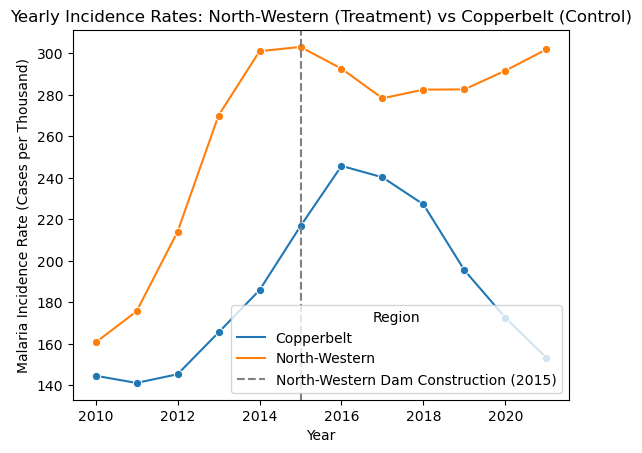

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df_filtered, x='Year', y='Value', hue='Name', marker='o')

plt.axvline(2015, color='gray', linestyle='--', label='North-Western Dam Construction (2015)')

plt.title('Yearly Incidence Rates: North-Western (Treatment) vs Copperbelt (Control)')
plt.xlabel('Year')
plt.ylabel('Malaria Incidence Rate (Cases per Thousand)')  
plt.legend(title='Region')

plt.show()


In [56]:
models = []
names = []

for window in range(1, 6):  
    
    did = df[(df['Year'] >= (2016 - window)) & (df['Year'] <= (2016 + window)) & df['Name'].isin(['Tigray', 'Somali'])].copy()
    
    did['post'] = np.where(did['Year'] >= 2016, 1, 0)
    did['treatment'] = np.where(did['Name'] == 'Tigray', 1, 0)
    did['post_treatment'] = did['post'] * did['treatment']
    
    did_model = ols('Value ~ post + treatment + post_treatment', did).fit()
    models.append(did_model)
    names.append('± ' + str(window) + ' Year')

table = summary_col(
    models,
    stars=True,
    float_format='%0.3f',
    model_names=names,
    info_dict={"N": lambda x: "{0:d}".format(int(x.nobs))}
)

print(table)



               ± 1 Year ± 2 Year  ± 3 Year  ± 4 Year  ± 5 Year
--------------------------------------------------------------
Intercept      28.931   27.282** 34.187*** 36.068*** 36.194***
               (18.205) (11.427) (10.570)  (9.837)   (9.272)  
post           -3.613   -3.779   -12.713   -13.993   -15.099  
               (22.297) (14.752) (13.982)  (13.197)  (12.554) 
treatment      -10.702  -10.592  -12.102   -8.461    -2.348   
               (25.746) (16.160) (14.948)  (13.911)  (13.112) 
post_treatment 3.833    4.077    5.989     1.958     -3.902   
               (31.533) (20.863) (19.774)  (18.664)  (17.754) 
R-squared      0.023    0.026    0.046     0.049     0.061    
R-squared Adj. -0.187   -0.086   -0.029    -0.008    0.015    
N              18       30       42        54        66       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [57]:
models = []
names = []

for window in range(1, 6):  
    did = df[(df['Year'] >= (2015 - window)) & (df['Year'] <= (2015 + window)) & df['Name'].isin(['Centre-Sud', 'Hauts-Bassins'])].copy()
    
    did['post'] = np.where(did['Year'] >= 2016, 1, 0)
    did['treatment'] = np.where(did['Name'] == 'Tigray', 1, 0)
    did['post_treatment'] = did['post'] * did['treatment']
    
    did_model = ols('Value ~ post + treatment + post_treatment', did).fit()
    models.append(did_model)
    names.append('± ' + str(window) + ' Year')

table = summary_col(
    models,
    stars=True,
    float_format='%0.3f',
    model_names=names,
    info_dict={"N": lambda x: "{0:d}".format(int(x.nobs))}
)

print(table)



                ± 1 Year   ± 2 Year   ± 3 Year   ± 4 Year   ± 5 Year 
---------------------------------------------------------------------
Intercept      210.351*** 223.650*** 235.201*** 243.382*** 250.177***
               (66.123)   (52.631)   (46.012)   (41.466)   (38.161)  
post           -49.461    -71.003    -84.801    -93.195    -98.059*  
               (114.528)  (83.217)   (70.284)   (62.198)   (56.601)  
treatment      31.252     35.279     40.300     44.269     46.622    
               (93.512)   (74.432)   (65.070)   (58.641)   (53.967)  
post_treatment -1.019     -11.857    -19.938    -25.872    -27.903   
               (161.968)  (117.687)  (99.396)   (87.962)   (80.046)  
R-squared      0.037      0.071      0.097      0.115      0.123     
R-squared Adj. -0.169     -0.036     0.026      0.061      0.080     
N              18         30         42         54         66        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [58]:
models = []
names = []

for window in range(1, 6):  
    did = df[(df['Year'] >= (2015 - window)) & (df['Year'] <= (2015 + window)) & df['Name'].isin(['North-Western', 'Copperbelt'])].copy()
    
    did['post'] = np.where(did['Year'] >= 2016, 1, 0)
    did['treatment'] = np.where(did['Name'] == 'North-Western', 1, 0)
    did['post_treatment'] = did['post'] * did['treatment']
    
    did_model = ols('Value ~ post + treatment + post_treatment', did).fit()
    models.append(did_model)
    names.append('± ' + str(window) + ' Year')

table = summary_col(
    models,
    stars=True,
    float_format='%0.3f',
    model_names=names,
    info_dict={"N": lambda x: "{0:d}".format(int(x.nobs))}
)

print(table)



                ± 1 Year ± 2 Year ± 3 Year ± 4 Year  ± 5 Year
-------------------------------------------------------------
Intercept      80.422    76.113*  71.790** 68.766** 67.025***
               (50.653)  (38.000) (31.162) (26.688) (23.557) 
post           15.721    19.632   22.411   21.622   19.733   
               (87.733)  (60.084) (47.600) (40.033) (34.940) 
treatment      45.927    46.331   42.852   38.143   33.952   
               (71.634)  (53.741) (44.069) (37.743) (33.314) 
post_treatment -20.678   -22.456  -17.150  -8.707   0.388    
               (124.074) (84.971) (67.317) (56.615) (49.413) 
R-squared      0.033     0.034    0.035    0.036    0.040    
R-squared Adj. -0.174    -0.078   -0.041   -0.022   -0.007   
N              18        30       42       54       66       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
